In [ ]:

# Importing neecessary librarys


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Make outputs easier to read
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# Plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)




In [2]:

# 2) Load Data 



train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

# Display first 10 rows of training data 
train_df.head(10)


Train shape: (891, 12)
Test shape : (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#making a copy
df = train_df.copy()


In [4]:

# Initial Inspection



print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types and non-null counts:")
df.info()

print("\nDescriptive statistics (numeric columns):")
df.describe()


Dataset shape: (891, 12)

Column names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Descriptive statistics (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Date-related Columns**

The Titanic dataset does not contain any date or time-related variables.


In [5]:

# Missing Value Analysis


missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage (%)": missing_percent.round(2)
}).sort_values(by="Missing Count", ascending=False)

missing_df


,Missing Count,Missing Percentage (%)
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [6]:

# Duplicate Records Check


duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


**Impute Age using grouped median (Sex × Pclass)**

Because Age distribution differs by gender and class

Grouped median:

Preserves demographic structure

Reduces bias compared to a single global median




In [7]:

# Handle Missing Age Values


# Check missing Age count before imputation
print("Missing Age values before:", df["Age"].isnull().sum())

# Impute Age using median grouped by Sex and Pclass
df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(
    lambda x: x.fillna(x.median())
)

# Check missing Age count after imputation
print("Missing Age values after :", df["Age"].isnull().sum())


Missing Age values before: 177
Missing Age values after : 0


**Handle missing Embarked values (mode)**

Because very few values are missing so we can use most dominant boarding location

In [8]:

# Handle Missing Embarked Values


# Check missing Embarked values before
print("Missing Embarked values before:", df["Embarked"].isnull().sum())

# Impute with most frequent value 
embarked_mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(embarked_mode, inplace=True)

# Check missing Embarked values after
print("Missing Embarked values after :", df["Embarked"].isnull().sum())


Missing Embarked values before: 2
Missing Embarked values after : 0


C:\Users\User\AppData\Local\Temp\ipykernel_14456\3815759273.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(embarked_mode, inplace=True)


**Handle Cabin by creating a binary indicator**

I do not impute cabin numbers (that would be fake data).

Instead, I extract information from missingness itself.

Having a cabin often correlates with higher class


In [9]:

# Handle Cabin Feature


# Create a binary indicator for cabin availability
df["HasCabin"] = df["Cabin"].notnull().astype(int)

# Verify distribution
df["HasCabin"].value_counts()


HasCabin
0    687
1    204
Name: count, dtype: int64

**Feature Engineering**

*Create AgeGroup*

Converts continuous age into interpretable categories

Makes survival analysis easier to explain

Aligns with historical evacuation priorities

In [24]:

# Create AgeGroup Feature


def age_group(age):
    if age < 18:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

df["AgeGroup"] = df["Age"].apply(age_group)

# Verify distribution
df["AgeGroup"].value_counts()


AgeGroup
Adult     752
Child     113
Senior     26
Name: count, dtype: int64

*Create FamilySize*

SibSp and Parch individually are incomplete

FamilySize reflects actual travel group size

Often more predictive and interpretable

In [10]:

# Create FamilySize Feature


df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


df["FamilySize"].describe()


count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

*Create IsAlone indicator*

Traveling alone vs with family affects survival chances


In [11]:

# Create IsAlone Feature


df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

df["IsAlone"].value_counts()


IsAlone
1    537
0    354
Name: count, dtype: int64

*Extract Title from Name*

Titles encode age, gender, and social status



In [14]:

# Extract Title from Name


df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)

# Normalize rare titles
df["Title"] = df["Title"].replace([
    "Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major",
    "Rev", "Sir", "Jonkheer"
], "Rare")

df["Title"] = df["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

df["Title"].value_counts()


Title
Mr              517
Miss            185
Mrs             126
Master           40
Rare             22
the Countess      1
Name: count, dtype: int64

**Outlier Detection & Handling**

*Detect Fare outliers using IQR*


In [15]:

# Outlier Detection: Fare


Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Fare IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outlier_count = ((df["Fare"] < lower_bound) | (df["Fare"] > upper_bound)).sum()
print("Number of Fare outliers:", outlier_count)


Fare IQR: 23.0896
Lower bound: -26.724
Upper bound: 65.6344
Number of Fare outliers: 116


Many high Fare values exist

These represent wealthier passengers (1st class)

Removing them would distort socio-economic effects

**Log-transform Fare for analysis & visualization**



In [16]:

# Fare Transformation

df["Fare_log"] = np.log1p(df["Fare"])

df[["Fare", "Fare_log"]].describe()


,Fare,Fare_log
count,891.000000,891.000000
mean,32.204208,2.962246
std,49.693429,0.969048
min,0.000000,0.000000
25%,7.910400,2.187218
50%,14.454200,2.737881
75%,31.000000,3.465736
max,512.329200,6.240917


log1p handles zero values safely

Reduces skew

Improves visualization clarity

Original Fare remains untouched

**Drop Non-essential Columns**

In [17]:

# Drop Non-essential Columns


columns_to_drop = [
    "PassengerId",  # Identifier only
    "Name",         # Used for Title extraction
    "Ticket",       # No clear analytical structure
    "Cabin"         # Replaced by HasCabin
]

df.drop(columns=columns_to_drop, inplace=True)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,Title,Fare_log
0,0,3,male,22.0,1,0,7.2500,S,0,2,0,Mr,2.110213
1,1,1,female,38.0,1,0,71.2833,C,1,2,0,Mrs,4.280593
2,1,3,female,26.0,0,0,7.9250,S,0,1,1,Miss,2.188856
3,1,1,female,35.0,1,0,53.1000,S,1,2,0,Mrs,3.990834
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,Mr,2.202765


**EDA**

In [25]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,FamilySize,IsAlone,Title,Fare_log,AgeGroup
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,6,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,Mr,NaN,Adult
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,NaN,NaN,NaN,517,NaN,752
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,0.228956,1.904602,0.602694,NaN,2.962246,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,0.420397,1.613459,0.489615,NaN,0.969048,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,0.000000,1.000000,0.000000,NaN,2.187218,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,0.000000,1.000000,1.000000,NaN,2.737881,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,0.000000,2.000000,1.000000,NaN,3.465736,NaN


**Gender distribution**

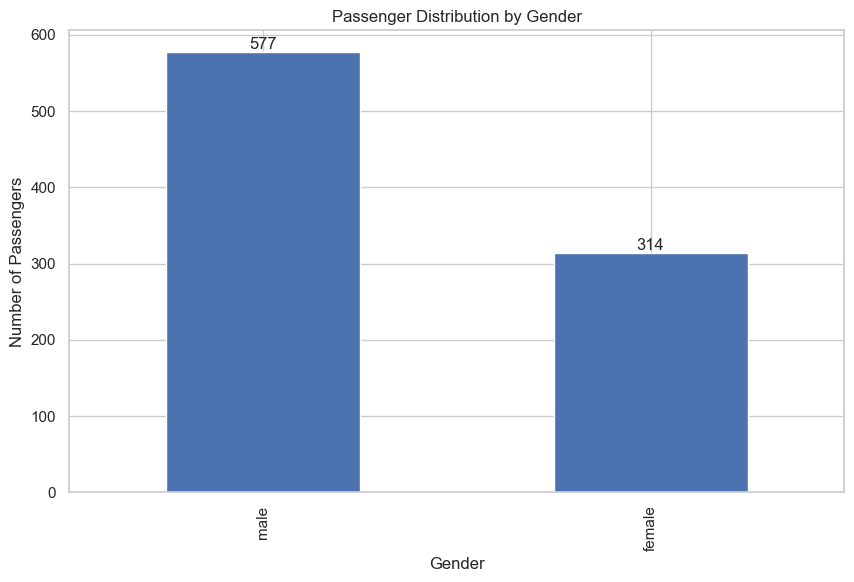

In [19]:

# Gender Distribution


gender_counts = df["Sex"].value_counts()

ax = gender_counts.plot(kind="bar")
ax.set_title("Passenger Distribution by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Passengers")

# Annotate bars
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.show()


The dataset contains significantly more male passengers than female passengers.

**Age distribution**

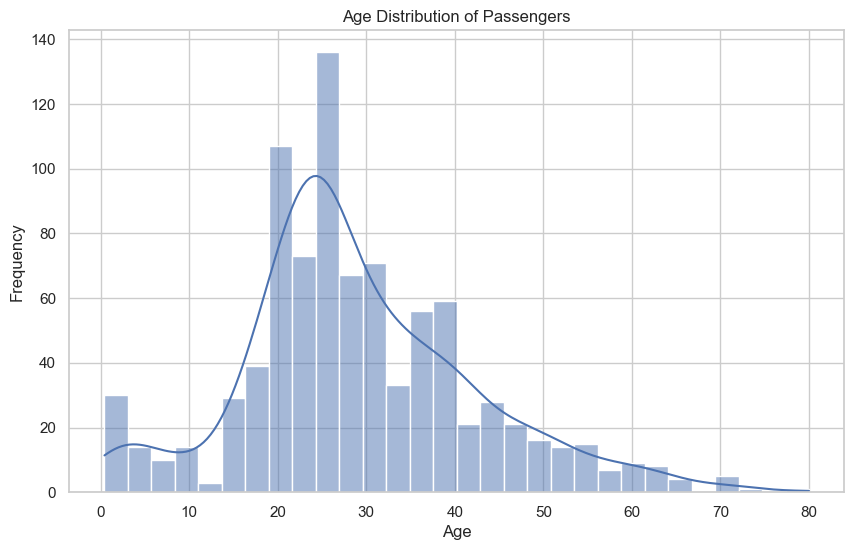

In [20]:

# Age Distribution


sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Majority of passengers are adults

Presence of children and elderly passengers

Distribution is slightly right-skewed

*Survival by gender*

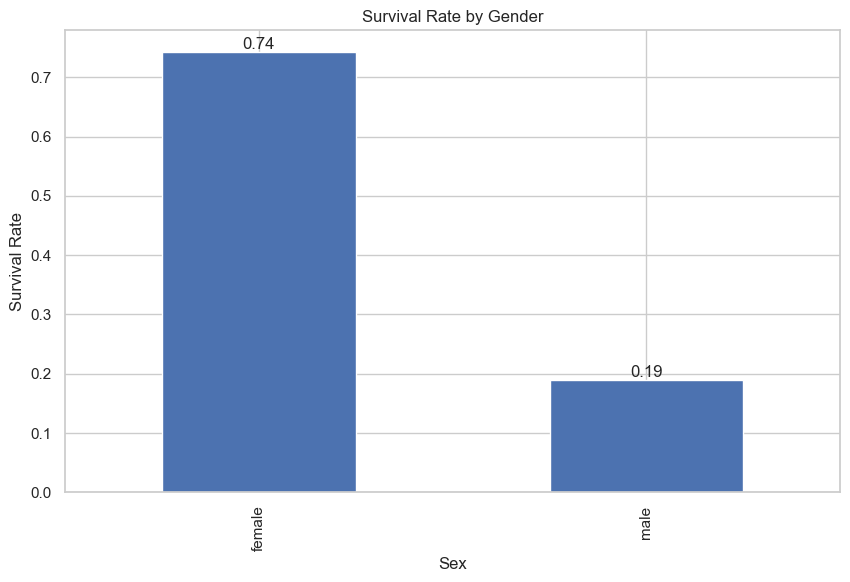

In [21]:

# Survival by Gender


survival_by_gender = df.groupby("Sex")["Survived"].mean()

ax = survival_by_gender.plot(kind="bar")
ax.set_title("Survival Rate by Gender")
ax.set_ylabel("Survival Rate")

# Annotate rates
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.show()


Female passengers had a substantially higher survival rate

**Survival by gender and class**

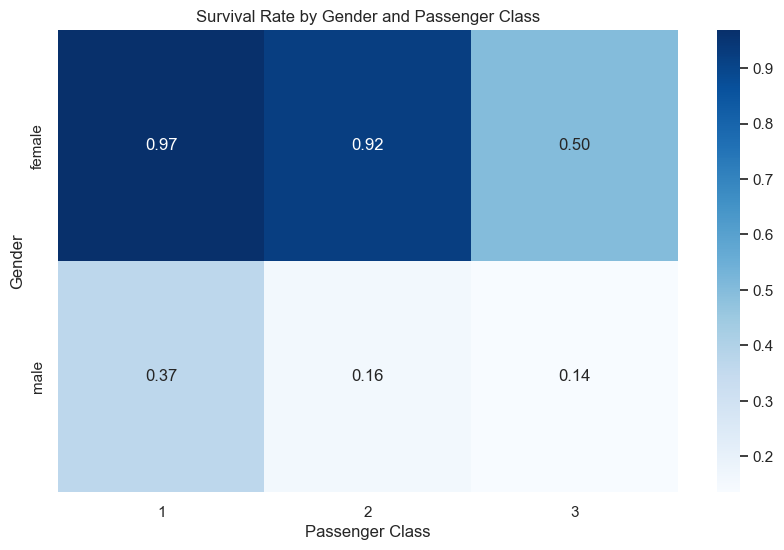

In [22]:

# Survival by Gender and Class


pivot = df.pivot_table(
    values="Survived",
    index="Sex",
    columns="Pclass",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Survival Rate by Gender and Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Gender")
plt.show()


Survival decreases from 1st to 3rd class

Females in all classes had higher survival rates

Class and gender jointly influence survival outcomes

**Survival by AgeGroup**

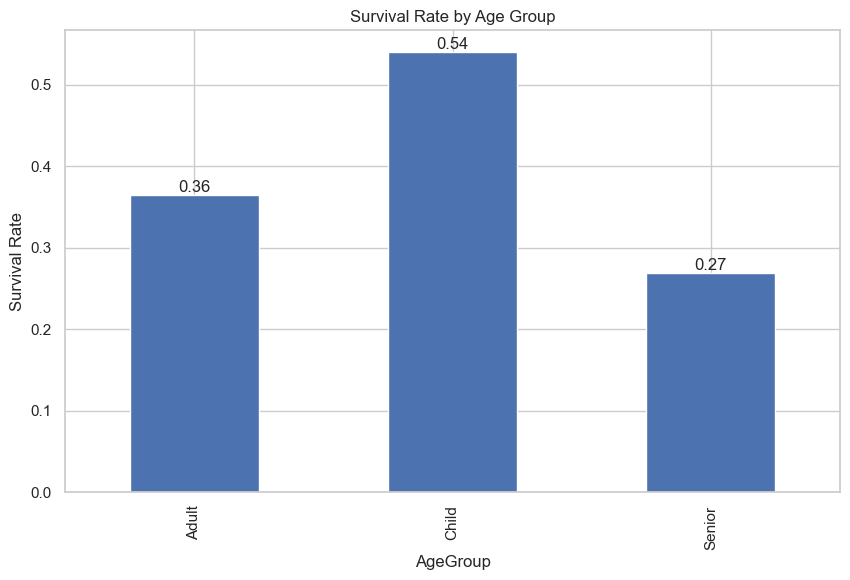

In [26]:

# Survival by Age Group


agegroup_survival = df.groupby("AgeGroup")["Survived"].mean()

ax = agegroup_survival.plot(kind="bar")
ax.set_title("Survival Rate by Age Group")
ax.set_ylabel("Survival Rate")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.show()


survival rate is higher in children, then adult and senior respectively which means children evacuation was a priority

**Survival vs Family Size**

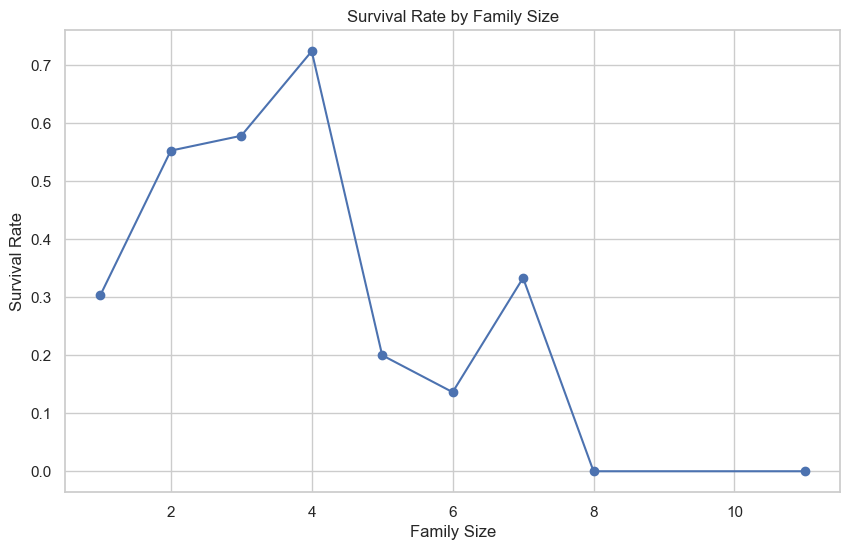

In [27]:

# Survival vs Family Size


family_survival = df.groupby("FamilySize")["Survived"].mean()

plt.plot(family_survival.index, family_survival.values, marker="o")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


Passengers traveling alone tend to have lower survival rates

Small families show better survival than very large families

**Fare vs Survival**

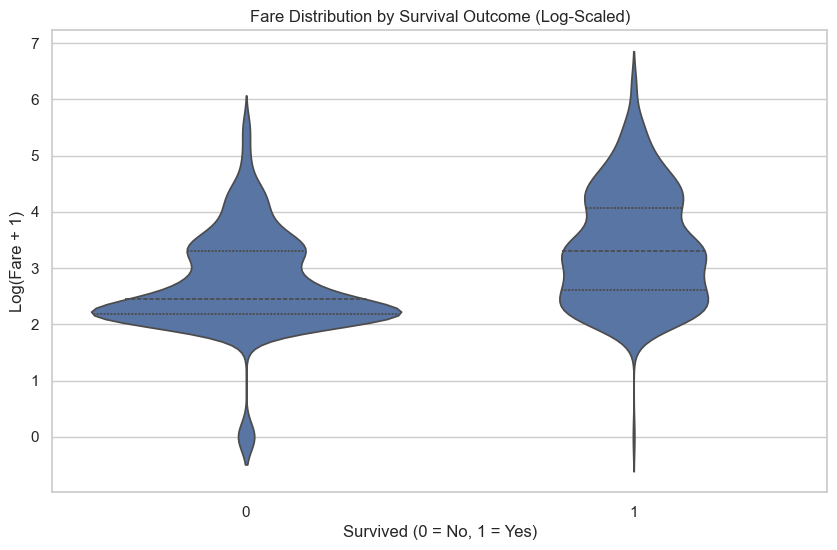

In [31]:

# Fare vs Survival (Violin Plot)


sns.violinplot(x="Survived", y="Fare_log", data=df, inner="quartile")
plt.title("Fare Distribution by Survival Outcome (Log-Scaled)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Log(Fare + 1)")
plt.show()


Survivors generally paid higher fares, as shown by the upward-shifted and wider distribution in the violin plot.
This indicates that higher socio-economic status and passenger class were strongly associated with better survival outcomes.

**Correlation matrix**

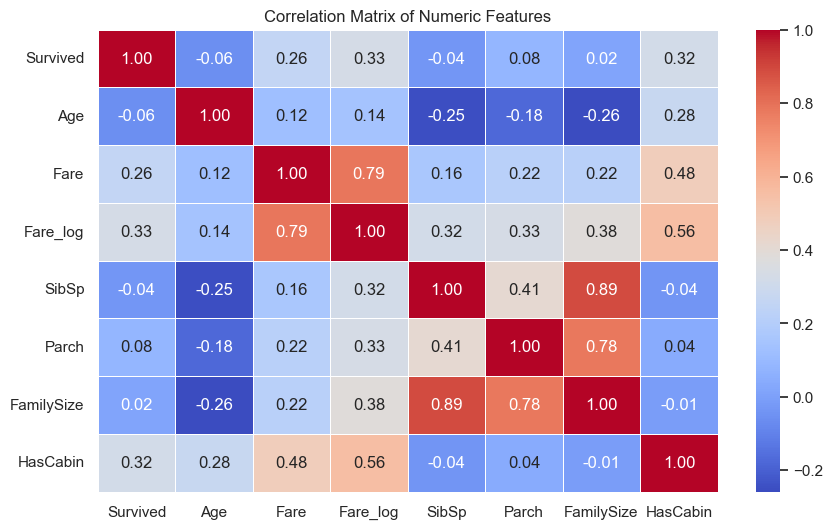

In [33]:

# Correlation Matrix 


numeric_cols = [
    "Survived", "Age", "Fare", "Fare_log",
    "SibSp", "Parch", "FamilySize", "HasCabin"
]

corr_matrix = df[numeric_cols].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Numeric Features")
plt.show()


Fare / Fare_log → positive correlation with survival

HasCabin → positive correlation with survival

FamilySize → weak linear correlation (non-linear effects seen in EDA)

Age → weak correlation → explains why age alone was not decisive

**Statistical Analysis**

In [35]:

# Measures of Central Tendency of some key vars


stats_summary = {

    "Age": {
        "Mean": df["Age"].mean(),
        "Median": df["Age"].median(),
        "Mode": df["Age"].mode()[0]
    },
    "Fare": {
        "Mean": df["Fare"].mean(),
        "Median": df["Fare"].median(),
        "Mode": df["Fare"].mode()[0]
    },
    "FamilySize": {
        "Mean": df["FamilySize"].mean(),
        "Median": df["FamilySize"].median(),
        "Mode": df["FamilySize"].mode()[0]
    }
}

pd.DataFrame(stats_summary).round(3)


,Age,Fare,FamilySize
Mean,29.112,32.204,1.905
Median,26.000,14.454,1.000
Mode,25.000,8.050,1.000


Fare shows a large gap between mean and median → right-skewed distribution

Age mean and median are close → relatively symmetric after imputation

FamilySize mode = 1 → most passengers traveled alone

**T-test: Survival by Gender**

In [36]:

# T-test: Survival by Gender


male_survival = df[df["Sex"] == "male"]["Survived"]
female_survival = df[df["Sex"] == "female"]["Survived"]

t_stat, p_value = stats.ttest_ind(
    female_survival,
    male_survival,
    equal_var=False
)

t_stat, p_value


(np.float64(18.67183317725917), np.float64(2.2836009226010533e-61))

An independent two-sample t-test was conducted to compare the survival rates of male and female passengers. The null hypothesis assumed no difference in mean survival rates between the two groups. The test produced a very large t-statistic and an extremely small p-value, leading to rejection of the null hypothesis. This indicates a statistically significant difference in survival rates by gender, with female passengers having a substantially higher survival rate.

**ChatGPT and claude was used as a coding assistant to help recall Python syntax and structure code cells more efficiently. All data cleaning decisions, analytical choices, visual interpretations, and statistical reasoning were independently understood and directed by me.**